In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

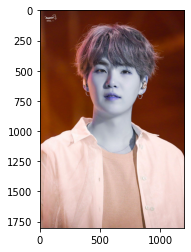

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/myg.jpeg'
img_bgr = cv2.imread(my_image_path) # load image by openCV
img_show = img_bgr.copy() # store image for print
plt.imshow(img_bgr)
plt.show()

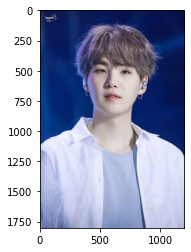

In [3]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb,1) #(image, num of image pyramid)
print(dlib_rects) # the box of detected face area

rectangles[[(399, 400) (861, 862)]]


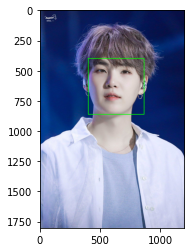

In [5]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),4,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [7]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p : (p.x,p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


In [8]:
print(list_landmarks)

[[(394, 532), (395, 589), (402, 643), (412, 694), (427, 743), (456, 785), (495, 819), (544, 845), (597, 859), (653, 855), (704, 837), (749, 804), (780, 762), (802, 715), (817, 663), (832, 608), (839, 552), (432, 463), (460, 434), (499, 426), (538, 433), (571, 452), (632, 452), (674, 440), (718, 438), (759, 449), (788, 480), (604, 500), (602, 533), (599, 565), (597, 599), (558, 638), (577, 645), (596, 649), (617, 647), (639, 643), (474, 506), (497, 493), (523, 495), (546, 516), (521, 516), (494, 514), (669, 521), (693, 504), (719, 506), (741, 521), (719, 528), (691, 526), (535, 716), (557, 695), (580, 683), (597, 689), (613, 684), (639, 701), (669, 724), (638, 741), (613, 748), (595, 749), (578, 746), (555, 737), (546, 716), (580, 706), (597, 707), (613, 707), (655, 722), (613, 719), (597, 719), (580, 717)]]


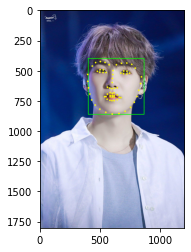

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 7, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect,landmark in zip(dlib_rects,list_landmarks):
    print(landmark[30]) # landmark[30] = nose
    x = landmark[30][0]
    y = landmark[30][1]+dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(597, 599)
(x,y) : (597,830)
(w,h) : (463,463)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Load sticker image 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(463, 463, 3)


In [12]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (366,367)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (366,367)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

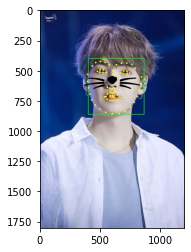

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

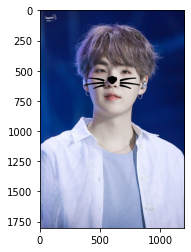

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 밝기 조절된 사진에도 작동할까 ? 

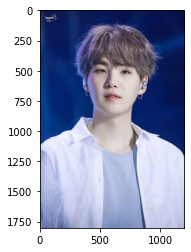

In [17]:
plt.imshow(img_rgb)

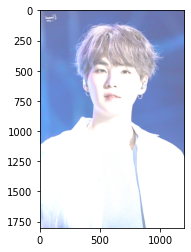

In [18]:
def brightness(img, brightness=True):
    
    if brightness :
        m = np.ones(img.shape,dtype='uint8')*100
        result = cv2.add(img,m)
    else :
        m = np.ones(img.shape,dtype='uint8')*50
        result = cv2.subtract(img,m)
        
    return result 

img_bright = brightness(img_rgb)
plt.imshow(img_bright)


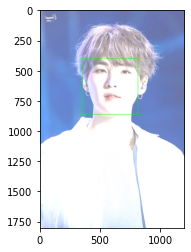

In [19]:
dlib_rects = detector_hog(img_bright, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bright, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

#img_show_bright =  cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB)
plt.imshow(img_bright)
plt.show()


In [20]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_bright, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


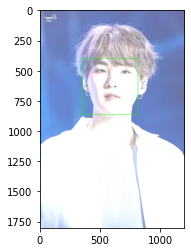

In [21]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bright, point, 2, (0, 255, 255), -1)

plt.imshow(img_bright)
plt.show()

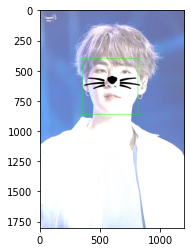

In [23]:
sticker_area = img_bright[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bright[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_bright)
plt.show()


## 잘 작동한다.
- Hog 는 밝기나 색상이 아닌 oriented edge 로 이미지를 분류하기 때문에